In [1]:
import nibabel as nib
import numpy as np
import os
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_random_pairs():
    f = list(os.walk(path))
    seqs = f[0][1]
    
    # Here we select the IXI keys as keys for our dictionary and the path of the image as value
    im1 = {im.split('-')[0]: path+'/'+seqs[0]+'/'+im for im in f[1][2]}
    im2 = {im.split('-')[0]: path+'/'+seqs[1]+'/'+im for im in f[2][2]}
    
    # Select one random key
    ixi = random.choice(list(im1.keys()))
    
    # Select the images from our dictionary
    try:
        image_t1 = im1[ixi]
        image_t2 = im2[ixi]
    except KeyError:
        print("There are no matching images")
    
    # Open and load the images
    image_t1 = nib.load(image_t1).get_fdata()
    image_t2 = nib.load(image_t2).get_fdata()
    
    # Select one random slice (assuming both images have the same shape)
    slices, plane, slc = select_slice(image_t1)
    
    # Display both images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    ax[0].imshow(image_t1[slices].squeeze(), cmap='gray')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title(ixi+': '+seqs[0]+ ' ' + plane +' image, slice '+ str(slc))
    
    ax[1].imshow(image_t2[slices].squeeze(), cmap='gray')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title(ixi+': '+seqs[1]+ ' ' + plane +' image, slice '+ str(slc))
    plt.show()

In [3]:
def select_slice(im):
    planes = ['coronal', 'axial', 'sagittal']
    
    pl = random.randint(0, 2)
    slc = random.randint(0, im.shape[pl])
    
    slices = [slice(None, None, None)]*3
    slices[pl] = slice(slc, slc+1, 1)

    return tuple(slices), planes[pl], slc

In [4]:
path = '/home/m/MedicalImages/MRI_Images/small_data/small'

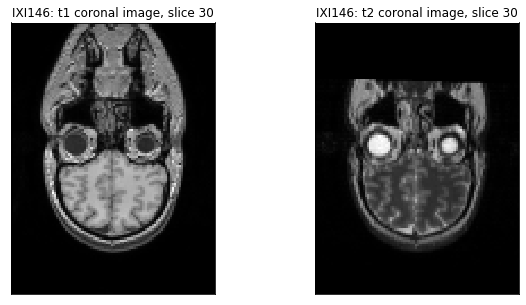

In [5]:
show_random_pairs()

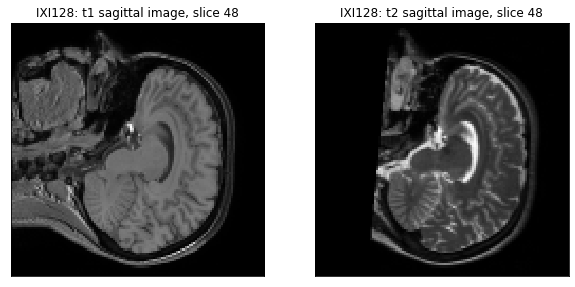

In [14]:
show_random_pairs()

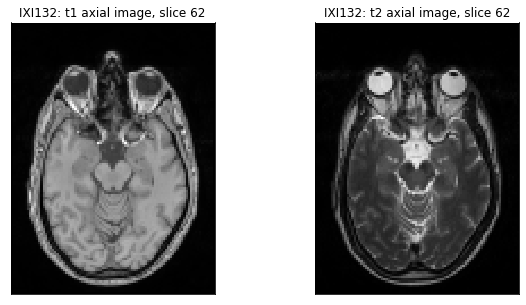

In [9]:
show_random_pairs()

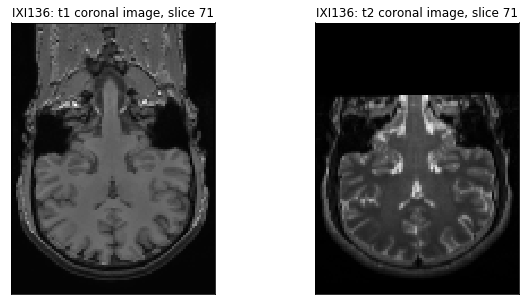

In [12]:
show_random_pairs()